# Import the Dataset

In [1]:
import pandas as pd

In [2]:
fashion_text = pd.read_csv('fashion_text_dataset.csv')
fashion_text.head(20)

description        category
0                Sless Flippy Mini Dress   women dresses
1                     Midi Pleated Skirt    women skirts
2    Stamos Mix Silk Raglan Knit Sweater     men outwear
3                Basic Training Tank Top        men tops
4       Fashion Camouflage Hooded Jacket   women outwear
5                Straight Leg Sweatpants    men trousers
6                       Hooded Pull Over     men outwear
7               Ally 3/4 Spring Pullover   women outwear
8                  Cropped Pleated Pants  women trousers
9         NB Athletics Archive Run Pants    men trousers
10          Lottie Paperbag Waist Shorts    women shorts
11                       Logocon T-Shirt        men tops
12  Comfortable Round Neck Print T-Shirt   women outwear
13                 Skinny Stretch Chinos    men trousers
14            Flag Chest Logo Sweatshirt     men outwear
15              Meet You There 7/8 Pants    men trousers
16                          Chino Shorts      men shorts
17                     Blue Crew T-Shirt        men tops
18         Co-Ord Single Breasted Blazer   women outwear
19              Patterned Bermuda Shorts    women shorts

# Create a bag of words

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [4]:
docs = map(''.join, fashion_text[['description']].values.tolist())

#instantiate CountVectorizer()
cv=CountVectorizer(stop_words="english", analyzer='word', 
                             ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(docs)
print(word_count_vector.shape)


(23730, 5285)


Split our our dataset into a training set and a test set

In [5]:
x_train, x_test, y_train, y_test = train_test_split(fashion_text['description'], fashion_text['category'], test_size=0.2)

cvect=CountVectorizer(stop_words="english", analyzer='word', 
                             ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)
cvect.fit(x_train)
x_train_vectorized = cvect.transform(x_train)
x_test_vectorized = cvect.transform(x_test)

Fit our training set into a Multinomial Naive Bayes classifier

In [6]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train_vectorized, y_train)
y_pred = nb.predict(x_test_vectorized)
print("Accuracy score using CountVectorizer and Multinomial Naive Bayes: {}".format(accuracy_score(y_pred, y_test)))

Accuracy score using CountVectorizer and Multinomial Naive Bayes: 0.84850400337126


Fit our training set into a stochastic gradient descent classifier

In [7]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train_vectorized, y_train)
y_pred = sgd.predict(x_test_vectorized)
print("Accuracy score using CountVectorizer and SGD Classifier: {}".format(accuracy_score(y_pred, y_test)))

Accuracy score using CountVectorizer and SGD Classifier: 0.8868520859671302


If you change the number of ngrams, different combinations of words are given to the classifier

In [8]:
x_train, x_test, y_train, y_test = train_test_split(fashion_text['description'], fashion_text['category'], test_size=0.2)

cvect=CountVectorizer(stop_words="english", analyzer='word', 
                             ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)
cvect.fit(x_train)
x_train_vectorized = cvect.transform(x_train)
x_test_vectorized = cvect.transform(x_test)

In [9]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train_vectorized, y_train)
y_pred = nb.predict(x_test_vectorized)
print("Accuracy score using CountVectorizer and Multinomial Naive Bayes: {}".format(accuracy_score(y_pred, y_test)))

Accuracy score using CountVectorizer and Multinomial Naive Bayes: 0.8558786346396966


In [10]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train_vectorized, y_train)
y_pred = sgd.predict(x_test_vectorized)
print("Accuracy score using CountVectorizer and SGD Classifier: {}".format(accuracy_score(y_pred, y_test)))

Accuracy score using CountVectorizer and SGD Classifier: 0.8881163084702908


# Let's make our embeddings more informative by using TFIDF

Previously we took in the frequency of words across all documents, but if words such as 'the' occurs very frequently in every document, it will contribute to a high count frequency even though there is low informational value to it. Inverse Document Frequency penalises these words by reducing their count by a degree.

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
 
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf"])
 
# sort ascending
df_idf = df_idf.sort_values(by=['idf'])
df_idf.head(10)

idf
shorts  3.071509
dress   3.274374
skirt   3.280951
shirt   3.374695
pants   3.582892
sleeve  3.746757
jacket  3.813312
tee     3.957332
neck    4.027020
short   4.061522

When you combine them together...tfidf, the following shows the weights for 1 document

In [13]:
# count matrix
docs = map(''.join, fashion_text[['description']].values.tolist())
count_vector=cv.transform(docs)

# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df = df.sort_values(by=["tfidf"],ascending=False)
df.head(10)

tfidf
sless      0.699636
flippy     0.596798
mini       0.318760
dress      0.229640
pant       0.000000
paper      0.000000
paris      0.000000
pareo      0.000000
parched    0.000000
paragraph  0.000000

# Create a TFIDF embedding 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True, stop_words="english", analyzer='word', 
                             ngram_range=(1, 1))

docs = map(''.join, fashion_text[['description']].values.tolist())

# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

print('Length of vocab: ', len(tfidf_vectorizer.get_feature_names()))
print('Sample of vocab', tfidf_vectorizer.get_feature_names()[150:350]) # Sample of features

Length of vocab:  5285
Sample of vocab ['510', '511', '512', '518', '52797', '54', '58', '58825', '59373', '59406', '59407', '59409', '59411', '59463', '596346', '5in', '5palle', '5pocket', '60', '61831518', '65', '66', '689', '6m', '70', '705', '706', '707', '709', '710', '711', '712', '720', '721', '722', '724', '728', '72970', '72d', '73', '750', '75497', '75562', '76006', '76157', '765', '77', '77879', '779', '78', '790', '79488', '79697', '7_8', '7in', '80', '80s', '8419s', '8761w', '879', '8805', '8815', '8923', '90', '901', '902', '903', '9088', '90s', '912', '9212s', '93', '93306w', '93308w', '93343', '93368w', '93417w', '93442w', '94', '95', '96', '9710', '9717', '9717w', '98', 'a003', 'a171', 'a19', 'a249', 'a500151', 'aaa', 'aaron', 'ab', 'abaya', 'abbotsford', 'abby', 'abel', 'abella', 'abrig', 'abstract', 'ac', 'acacia', 'academy', 'accelerate', 'accent', 'accentuated', 'access', 'accessory', 'acclerate', 'accordian', 'ace', 'achiever', 'acid', 'action', 'activchill', 'act

This time we train a tfidf embedding with ngram of 2

In [15]:
x_train, x_test, y_train, y_test = train_test_split(fashion_text['description'], fashion_text['category'], test_size=0.2)

vect = TfidfVectorizer(ngram_range=(1, 2))
vect.fit(x_train)

x_train_vectorized = vect.transform(x_train)
x_test_vectorized = vect.transform(x_test)

print(x_train_vectorized.shape)
print(x_test_vectorized.shape)

(18984, 26430)
(4746, 26430)


In [16]:
sgd = SGDClassifier()
sgd.fit(x_train_vectorized, y_train)
y_pred = sgd.predict(x_test_vectorized)
print("Accuracy score using TFIDF and SGD Classifier: {}".format(accuracy_score(y_pred, y_test)))

Accuracy score using TFIDF and SGD Classifier: 0.8588284871470713


In [17]:
nb = MultinomialNB()
nb.fit(x_train_vectorized, y_train)
y_pred = nb.predict(x_test_vectorized)
print("Accuracy score using TFIDF and Multinomial Naive Bayes: {}".format(accuracy_score(y_pred, y_test)))

Accuracy score using TFIDF and Multinomial Naive Bayes: 0.8383902233459756


In [18]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train_vectorized, y_train)

y_pred = clf.predict(x_test_vectorized)
print("Accuracy score using TFIDF and Linear SVC: {}".format(accuracy_score(y_pred, y_test)))

Accuracy score using TFIDF and Linear SVC: 0.8744205646860514


### Test out on a sentence 

In [19]:
test = ['Her son wore a black shirt']
test_vect = vect.transform(test)


y_pred = sgd.predict(test_vect)
y_pred[0]

'men tops'

# TFIDF with Multilayer Perceptron (Deep Neural Network)

In [23]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, SGD


In [24]:
x_train, x_test, y_train, y_test = train_test_split(fashion_text['description'], fashion_text['category'], test_size=0.2)

vect = TfidfVectorizer(ngram_range=(1, 1), stop_words='english', analyzer='word')
vect.fit(x_train)

x_train_vectorized = vect.transform(x_train)
x_test_vectorized = vect.transform(x_test)

print(x_train_vectorized.shape)
print(x_test_vectorized.shape)

(18984, 4830)
(4746, 4830)


In [25]:
#Adding dense layers to model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256,input_shape=(x_train_vectorized.shape[1],),activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = tf.keras.utils.to_categorical(y_train)
#le.inverse_transform(y_train)

In [27]:
history = model.fit(x_train_vectorized, y_train,
                    batch_size=256,
                    epochs=25,
                    verbose=1,
                    validation_split=0.15)

Train on 16136 samples, validate on 2848 samples
Epoch 1/25
16136/16136 [==============================] - 1s 49us/sample - loss: 1.8695 - acc: 0.4082 - val_loss: 0.7940 - val_acc: 0.7482
Epoch 2/25
16136/16136 [==============================] - 0s 29us/sample - loss: 0.5867 - acc: 0.7877 - val_loss: 0.4119 - val_acc: 0.8367
Epoch 3/25
16136/16136 [==============================] - 0s 28us/sample - loss: 0.3726 - acc: 0.8635 - val_loss: 0.3569 - val_acc: 0.8613
Epoch 4/25
16136/16136 [==============================] - 0s 29us/sample - loss: 0.2983 - acc: 0.8909 - val_loss: 0.3400 - val_acc: 0.8620
Epoch 5/25
16136/16136 [==============================] - 0s 29us/sample - loss: 0.2540 - acc: 0.9061 - val_loss: 0.3325 - val_acc: 0.8704
Epoch 6/25
16136/16136 [==============================] - 0s 28us/sample - loss: 0.2237 - acc: 0.9176 - val_loss: 0.3448 - val_acc: 0.8641
Epoch 7/25
16136/16136 [==============================] - 0s 29us/sample - loss: 0.2027 - acc: 0.9250 - val_loss: 0.3

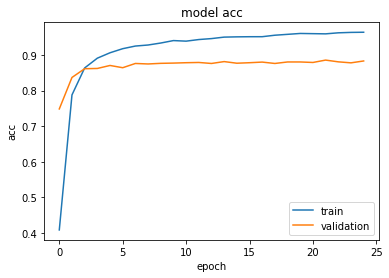

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

plot_train(history)

### Evaluation

In [29]:
y_test = le.fit_transform(y_test)
y_test = tf.keras.utils.to_categorical(y_test)

results =model.evaluate(x_test_vectorized,y_test)
print("Loss : % 5.2f, Accuracy : % 5.2f" %(results[0], results[1]))  

4746/4746 [==============================] - 0s 53us/sample - loss: 0.4138 - acc: 0.8856
Loss :  0.41, Accuracy :  0.89


In [62]:
# predict crisp classes for test set
yhat = model.predict(x_test_vectorized, verbose=0)

preds_labels = [[1 if x > 0.5 else 0 for idx,x in enumerate(i) ] for i in yhat]

In [63]:
from sklearn.metrics import multilabel_confusion_matrix, f1_score

f1_score(y_test, preds_labels, average='micro')

0.8861213720316623